In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [2]:
df = pd.read_csv("C:\\Users\\Administrator\\Desktop\\kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


1.
The data was taken in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' (ckd=chronic kidney disease). 

In [3]:
2.
df.drop('id', axis=1, inplace=True)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [4]:
3.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

There are 400 rows.There are 25 variables.It includes 24 features and 1  target.The target is a dichotomous variable.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26980\1918816390.py:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


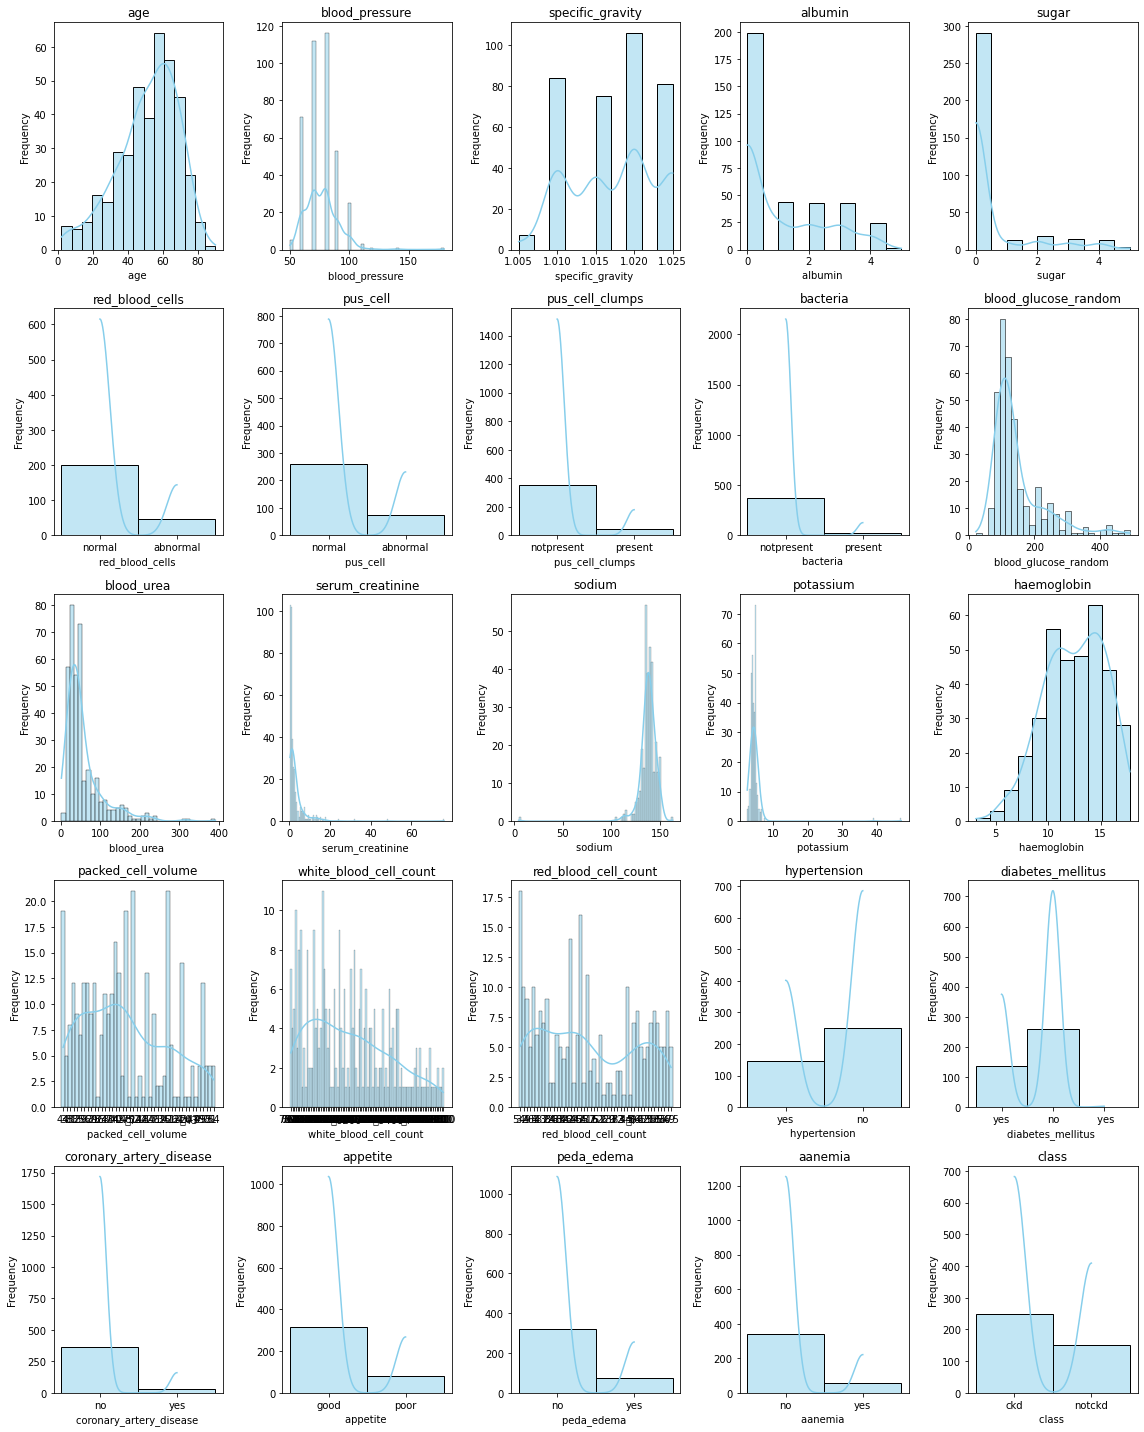

In [5]:
4.
num_features = len(df.columns)
num_colss=5
num_rows = (num_features - 1) // num_colss + 1  
fig, axes = plt.subplots(num_rows, num_colss, figsize=(16, 4*num_rows))

for i, feature in enumerate(df.columns):
    row = i // num_colss
    col = i % num_colss
    sns.histplot(df[feature], ax=axes[row, col], kde=True, color='skyblue')
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel(f'{feature} ')
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [6]:
cor = df.corr()
print(cor)

                           age  blood_pressure  specific_gravity   albumin  \
age                   1.000000        0.159480         -0.191096  0.122091   
blood_pressure        0.159480        1.000000         -0.218836  0.160689   
specific_gravity     -0.191096       -0.218836          1.000000 -0.469760   
albumin               0.122091        0.160689         -0.469760  1.000000   
sugar                 0.220866        0.222576         -0.296234  0.269305   
blood_glucose_random  0.244992        0.160193         -0.374710  0.379464   
blood_urea            0.196985        0.188517         -0.314295  0.453528   
serum_creatinine      0.132531        0.146222         -0.361473  0.399198   
sodium               -0.100046       -0.116422          0.412190 -0.459896   
potassium             0.058377        0.075151         -0.072787  0.129038   
haemoglobin          -0.192928       -0.306540          0.602582 -0.634632   

                         sugar  blood_glucose_random  blood_ure

Strongly correlated variables may have duplicate or redundant information. When selecting features, you can select one of the variables and ignore the other related variables to reduce the complexity of the model and improve the explanatory ability. In this correlation coefficient matrix, there is a strong positive correlation between blood_urea  and serum_creatinine, so only one of the variables can be selected and the other can be ignored when selecting features.

In [7]:
5.
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [8]:
median_values = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(median_values)
mode_values = df.mode().iloc[0]  
df[cat_cols] = df[cat_cols].fillna(mode_values)
LabelEncoder = LabelEncoder()
for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [9]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [10]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,31,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,31,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,1,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [12]:
6.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.562500,16.982996,2.000,42.000,55.00,64.000,90.000
blood_pressure,400.0,76.575000,13.489785,50.000,70.000,80.00,80.000,180.000
specific_gravity,400.0,1.017712,0.005434,1.005,1.015,1.02,1.020,1.025
albumin,400.0,0.900000,1.313130,0.000,0.000,0.00,2.000,5.000
sugar,400.0,0.395000,1.040038,0.000,0.000,0.00,0.000,5.000
red_blood_cells,400.0,0.882500,0.322418,0.000,1.000,1.00,1.000,1.000
pus_cell,400.0,0.810000,0.392792,0.000,1.000,1.00,1.000,1.000
pus_cell_clumps,400.0,0.105000,0.306937,0.000,0.000,0.00,0.000,1.000
bacteria,400.0,0.055000,0.228266,0.000,0.000,0.00,0.000,1.000
blood_glucose_random,400.0,145.062500,75.260774,22.000,101.000,121.00,150.000,490.000


No outliers were found after filling the missing values.

In [13]:
7.
df.corrwith(df['class']).abs().sort_values

<bound method Series.sort_values of age                        0.227842
blood_pressure             0.293693
specific_gravity           0.659504
albumin                    0.531562
sugar                      0.294555
red_blood_cells            0.282642
pus_cell                   0.375154
pus_cell_clumps            0.265313
bacteria                   0.186871
blood_glucose_random       0.379321
blood_urea                 0.369393
serum_creatinine           0.291245
sodium                     0.334900
potassium                  0.065218
haemoglobin                0.726368
packed_cell_volume         0.650531
white_blood_cell_count     0.094409
red_blood_cell_count       0.456467
hypertension               0.590438
diabetes_mellitus          0.546786
coronary_artery_disease    0.236088
appetite                   0.393341
peda_edema                 0.375154
aanemia                    0.325396
class                      1.000000
dtype: float64>

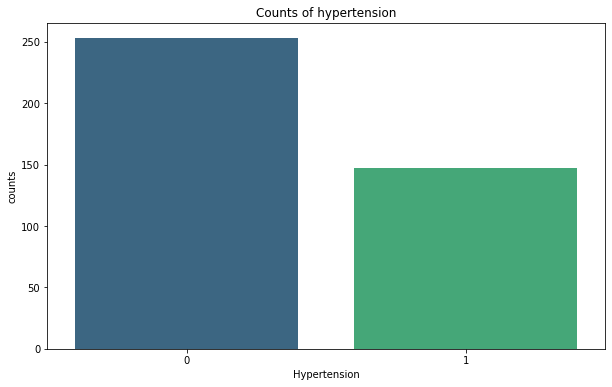

In [14]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'hypertension', data =df, palette = 'viridis')
plt.title('Counts of hypertension')
plt.xlabel('Hypertension')
plt.ylabel('counts')
plt.show()

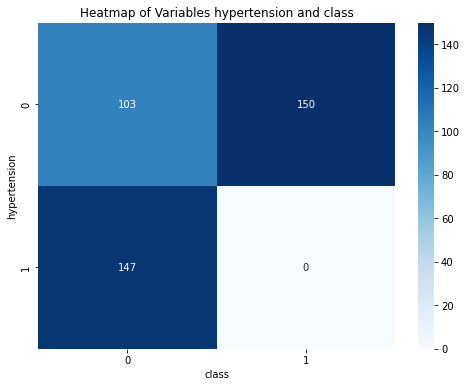

In [15]:
cross_tab = pd.crosstab(df['hypertension'], df['class'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Variables hypertension and class')
plt.xlabel('class')
plt.ylabel('hypertension')
plt.show()

In [16]:
8.
X = df.drop(['class', 'blood_urea', 'sugar','haemoglobin'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

9.
Two classifiers are used: Logistic Regression and DecisionTree. 

10.
Common performance measures for binary classification include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC).We chose accuracy and Precision to compare the performance of the classifiers.

In [17]:
11.12
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Accuracy','%.3f' % accuracy_score(y_test, y_pred_lr))
print('Precision','%.3f' % precision_score(y_test, y_pred_lr))


Accuracy 0.967
Precision 0.926


In [18]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,3,4,5,6,7,10],
    'min_samples_leaf': [1,2,3,4]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeClassifier(min_samples_split=10)

In [19]:
y_pred_clf =best_clf.predict(X_test)
print('Accuracy','%.3f' % accuracy_score(y_test, y_pred_clf))
print('Precision','%.3f' % precision_score(y_test, y_pred_clf))

Accuracy 0.975
Precision 0.980


The best decision tree parameters for this data are:**best_params

The accuracy of decision trees is higher than that of logistic regression.

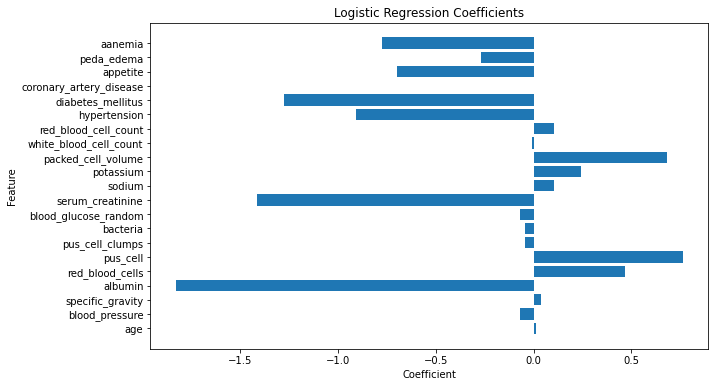

In [20]:
13.
coefficients = lr.coef_[0]
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), X.columns)  
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

                    Feature  Standardized Coefficient
0                       age                  0.370747
1            blood_pressure                 -0.417562
2          specific_gravity                  2.401390
3                   albumin                 -1.218078
4           red_blood_cells                  0.499987
5                  pus_cell                  0.432888
6           pus_cell_clumps                 -0.218670
7                  bacteria                 -0.102445
8      blood_glucose_random                 -0.780465
9          serum_creatinine                 -1.401698
10                   sodium                  0.584834
11                potassium                  0.133711
12       packed_cell_volume                  1.897285
13   white_blood_cell_count                 -0.328948
14     red_blood_cell_count                  0.455307
15             hypertension                 -1.475893
16        diabetes_mellitus                 -1.163550
17  coronary_artery_disease 

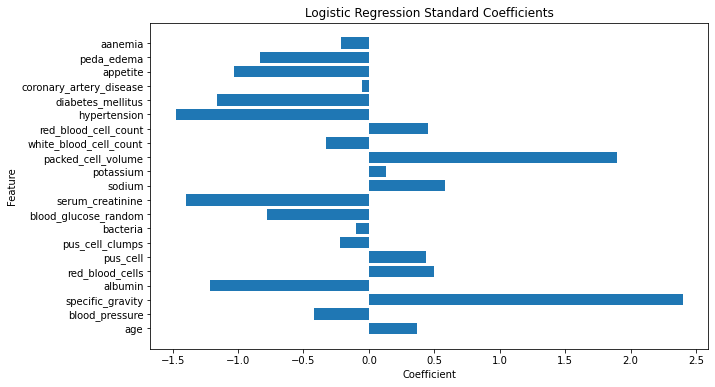

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logreg = LogisticRegression()
logreg.fit(X_scaled, y)
coefficients = logreg.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Standardized Coefficient': coefficients})
print(coef_df)
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), X.columns)  
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Standard Coefficients')
plt.show()

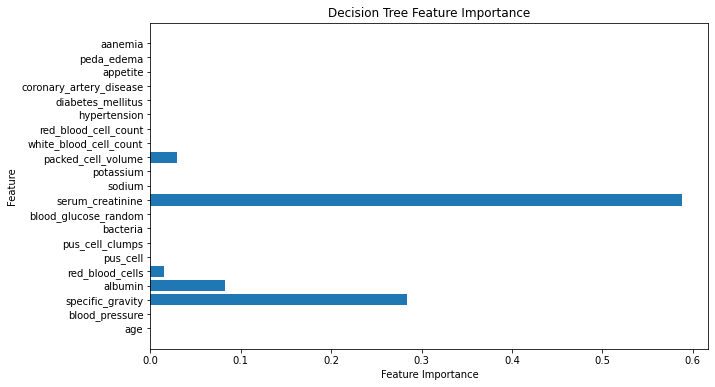

In [23]:
feature_importances = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X.columns) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

The important variables in logistic regression are:specific_gravity,packed_cell_volume and hypertension.

The important variables in the decision tree are:serum_creatinine,specific_gravity and albumin.

In [24]:
14.
pca = PCA(n_components=11)
logreg = LogisticRegression(max_iter=1000)
pipeline = Pipeline([('pca', pca), ('logreg', logreg)])
pipeline.fit(X, y)
score = pipeline.score(X, y)
print(score)


0.9775


After adding principal component analysis and dividing into 11 dimensions, the score was 0.9775, which was higher than the previous 0.967.

15.
Team Contributions:
